<a href="https://colab.research.google.com/github/KuriaDan/KuriaIPC1/blob/master/Moringa_Data_Science_Core_W1_Independent_Project_2019_06_Daniel_Kuria_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Defining the Question**

# 1. Defining the Question

### a) Specifying the Data Analytic Question

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In [31]:
# Let's first import the libraries we will need
# ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # Data visualisation libraries 
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
%pylab inline
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['figure.figsize'] = (8,6)
from biokit.viz import corrplot

Populating the interactive namespace from numpy and matplotlib


In [4]:
#loading our dataset
FinDat = pd.read_csv('Financial Dataset - 1.csv')
FinDat.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#importing the pandas_profiling to preview the dataset and view the profile report
!pip3 install pandas-profiling
import pandas_profiling as pp
pp.ProfileReport(FinDat)

Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [0]:
##previewing the columns
FinDat.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

# Tidying the Dataset

Identifying the Missing Data

In [5]:
#Counting the number of null values in the dataset
FinDat.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

dropping the null values

In [0]:
#dropping the null values
Fin = FinDat.dropna()

 More data cleaning procedures

In [0]:
##dropping the uniqueid column as it has a high cardinality
Fin=Fin.drop(columns=['uniqueid'])

In [0]:
# Get names of indexes for which year is greater than 2018
indexNames = Fin[Fin['year'] > 2018 ].index
# Delete these row indexes from dataFrame
Fin.drop(indexNames , inplace=True)

In [9]:
Fin.year.unique()

array([2018, 2016, 2017])

#Exploratory Analysis

Ploting the univariate summaries and recording our observations

In [0]:
#univariate analysis of Household size column
mean = Fin.household_size.mean()
stdh = Fin.household_size.std()
modeh = Fin.household_size.mode()
medianh = Fin.household_size.median()
varh = Fin.household_size.var()


In [0]:
mean
#the average size of households in the four countries is 3.7

3.688560411311054

In [0]:
medianh
#the median size of households in the four countries is 3

3.0

In [0]:
modeh
#the mode of the column is 2

0    2.0
dtype: float64

In [0]:
stdh
#the standard deviation of the size of the households in the four countries is 2.28

2.2812745975350435

In [0]:
varh

5.204213789358675

In [0]:
meana = Fin["Respondent Age"].mean()
stda = Fin['Respondent Age'].std()
modea = Fin['Respondent Age'].mode()
mediana = Fin['Respondent Age'].median()
vara = Fin['Respondent Age'].var()

In [0]:
meana
#the average age of the respondents in the study is 38.8 yrs

38.80706940874036

In [0]:
stda
#the standard deviation of the respondents age is 16.51

16.519904564514412

In [0]:
modea
#the mode of the respondents is 30

0    30.0
dtype: float64

In [0]:
mediana
#the median age of the respondents is 35

35.0

In [0]:
vara
#the variance of the ages is 272.91

272.90724682066417

# Visualisations

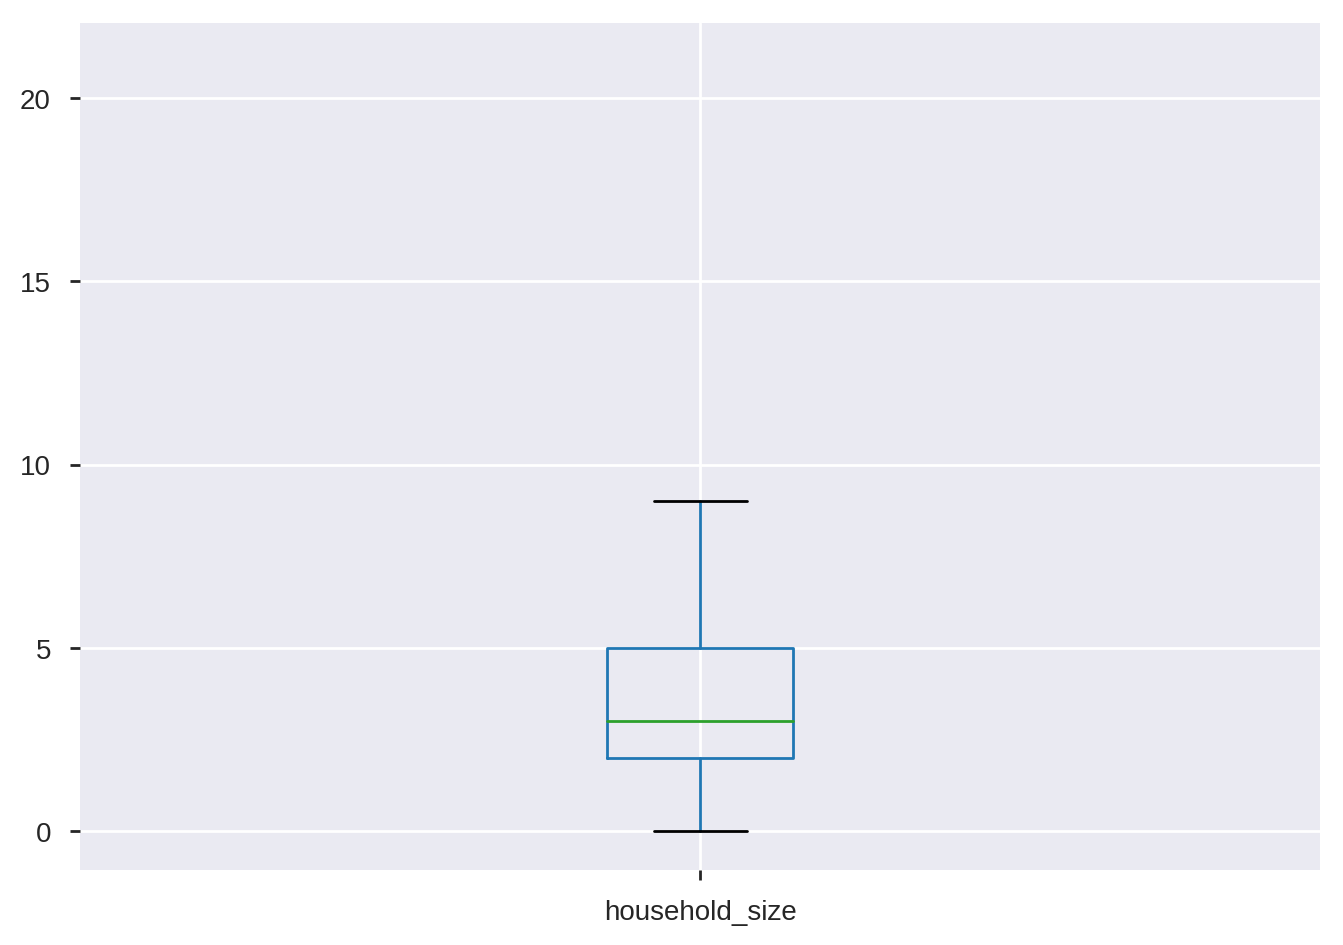

In [0]:
#boxplot of the household sizes
plt.figure(dpi=200)
Fin.boxplot(["household_size"])


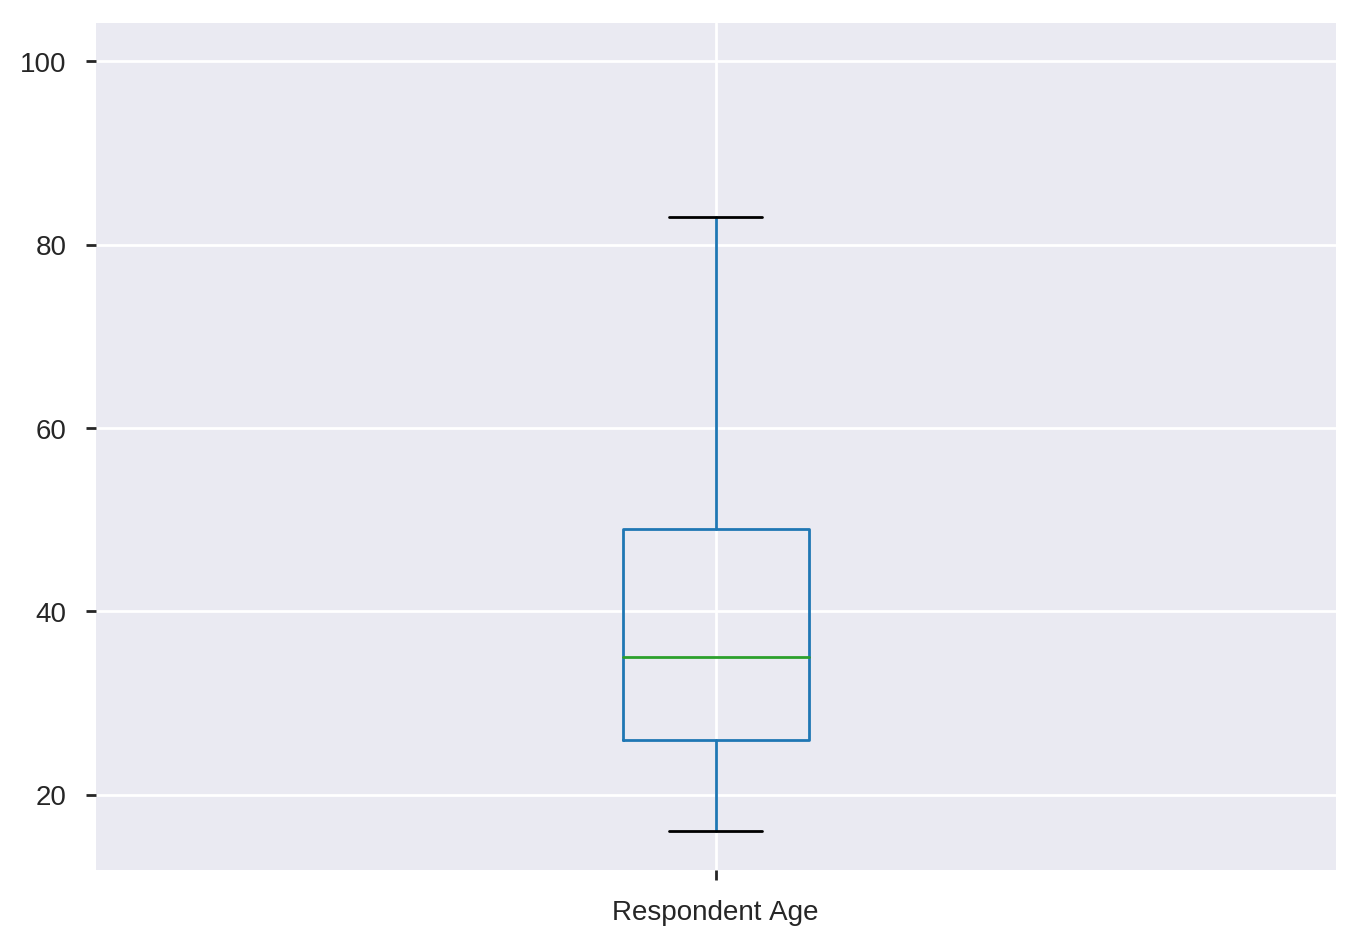

In [0]:
#boxplot of the respondents age columns
plt.figure(dpi=200)
Fin.boxplot(["Respondent Age"])



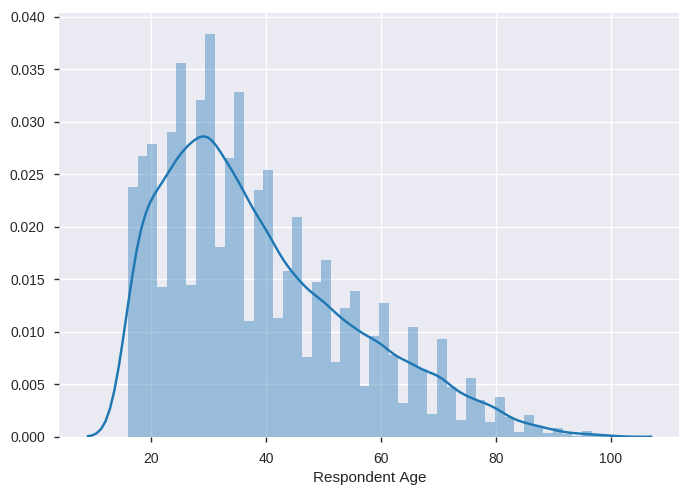

In [0]:
#histogram of the respondents ages
#Fin['Respondent Age'].hist()
sns.distplot(Fin['Respondent Age'], kde=True)

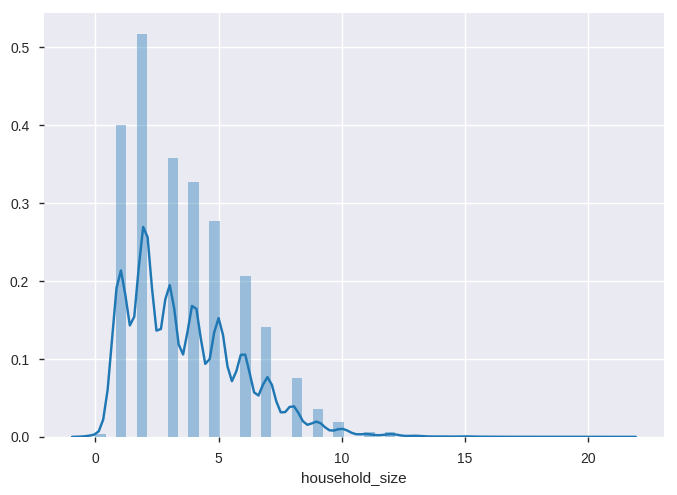

In [0]:
#histogram of the size of the households
#Fin['household_size'].hist()
sns.distplot(Fin.household_size, kde=True)

#Bivariate analysis

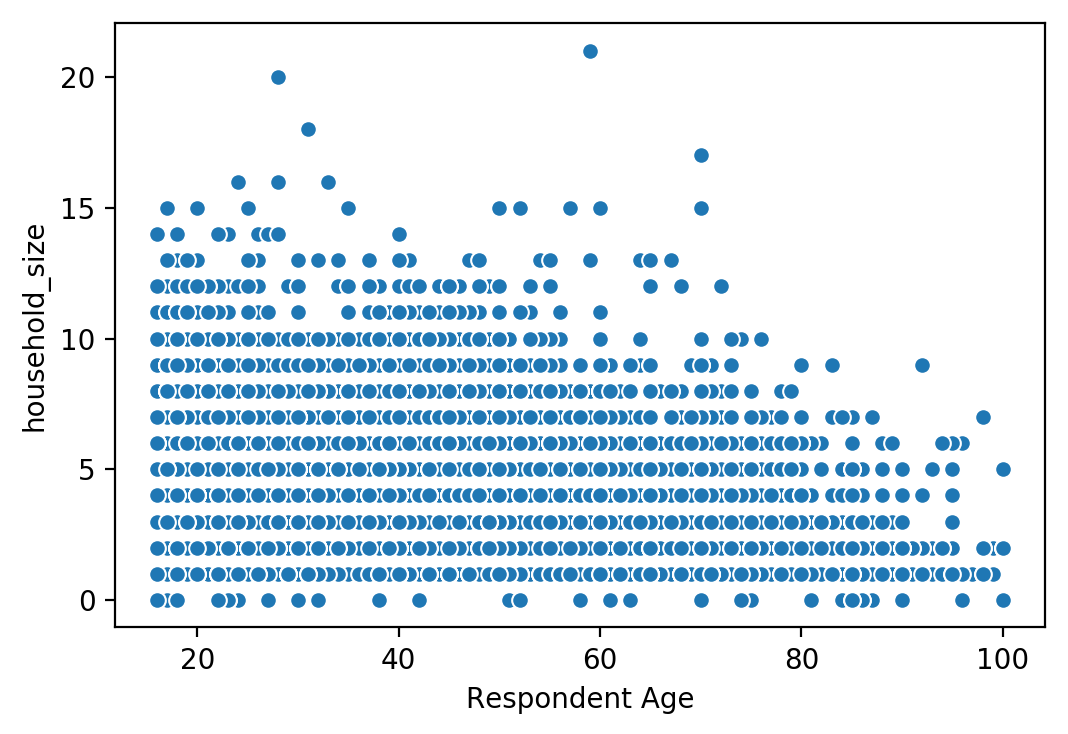

In [11]:
#using a scatter plot to compare the two variables
#Fin.plot(x='Respondent Age', y='household_size', kind='scatter')
plt.figure(dpi=200)
sns.scatterplot(Fin['Respondent Age'], Fin.household_size)

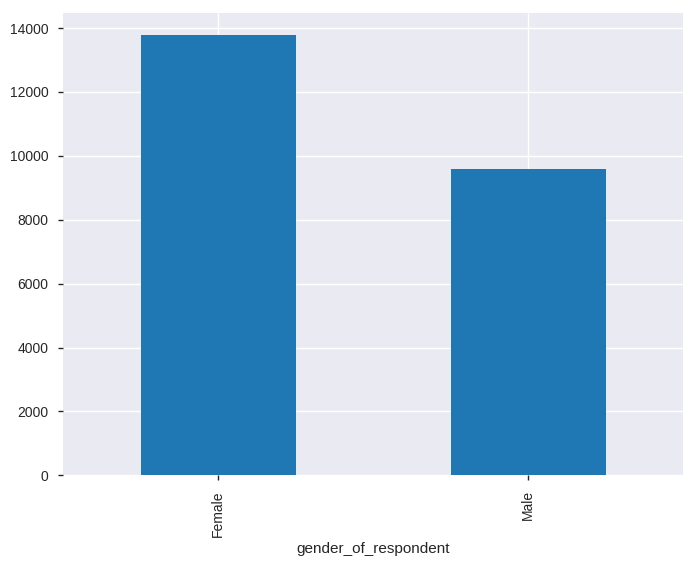

In [0]:
#comparison of the gender of the respondents
fin1 = Fin.groupby(['gender_of_respondent'])['gender_of_respondent'].count()
fin1

fin1.plot(kind='bar', figsize=(8, 6))
plt.show()

In [12]:
#calculating the correlation between respondent age and household size
Fin['Respondent Age'].corr(Fin.household_size)

#respondent age and size of houshold exhibits weak negative correlation


-0.11967115234154871

In [18]:
!pip3 install biokit

     |████████████████████████████████| 204kB 2.8MB/s 
     |████████████████████████████████| 61kB 25.4MB/s 
     |████████████████████████████████| 215kB 50.8MB/s 
     |████████████████████████████████| 2.2MB 48.6MB/s 
     |████████████████████████████████| 3.2MB 32.8MB/s 
     |████████████████████████████████| 153kB 50.2MB/s 
  Created wheel for biokit: filename=biokit-0.4.4-cp36-none-any.whl size=212621 sha256=945f91f2007e942cb4fb3e001a7f6898137594c4064a511033ff5b8cc0334110
  Stored in directory: /root/.cache/pip/wheels/48/e4/9e/7eca6f96742d7eee090aa8d5222026413702df9511f7894125
  Created wheel for easydev: filename=easydev-0.9.37-cp36-none-any.whl size=72197 sha256=fbb7be7adfa96faf621727b9c3cff21f331d8211bd9f79b1c4115f134fffad97
  Stored in directory: /root/.cache/pip/wheels/cc/c3/50/d1813a2661a77281137a27ab2e03ae13dee2c7887b984461b4
  Created wheel for bioservices: filename=bioservices-1.6.0-cp36-none-any.whl size=219218 sha256=7f72b04238784e9dc59d48f95f644173a0dcbdbc74312aebb

In [0]:
x.corr(method='pearson', min_periods=1)

#Multivariate Analysis

In [19]:
x.corr(method='pearson', min_periods=1)

,year,household_size,Respondent Age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
year,1.000000,-0.052484,-0.018554,0.713300,-0.886023,0.016489,0.378159,-0.214621,0.214621,0.066637,-0.066637,0.000024,-0.000024,-0.059316,0.030285,-0.013929,0.081738,0.002436,-0.023468,0.018040,0.022299,-0.004649,0.021121,-0.041373,-0.016910,-0.095471,0.022299,-0.081048,0.119042,0.040393,0.129731,0.012318,-0.249458,0.055667,0.093995,-0.006624,-0.155148,0.081375,0.101320,0.095562,0.181242
household_size,-0.052484,1.000000,-0.119671,0.077525,0.267970,-0.478472,0.178294,0.274154,-0.274154,-0.098177,0.098177,-0.010070,0.010070,0.203904,-0.244217,0.020718,0.013822,0.044016,0.108170,-0.130272,-0.008633,0.346324,-0.182569,-0.154061,0.001883,-0.006531,0.004557,-0.024300,0.103149,-0.096517,-0.023578,0.023656,0.186819,0.002535,-0.071401,-0.046451,0.013464,-0.064869,0.062435,0.009102,-0.163152
Respondent Age,-0.018554,-0.119671,1.000000,0.029294,0.021959,-0.012208,-0.062924,0.047614,-0.047614,0.103969,-0.103969,-0.013373,0.013373,-0.302935,0.419646,-0.078846,-0.134989,-0.195297,-0.111171,-0.119170,0.005260,0.054593,-0.298220,0.462584,0.024050,0.360483,0.009464,-0.071316,-0.210563,-0.090477,-0.037490,-0.003905,0.153864,-0.005603,-0.062173,0.172067,-0.088874,-0.059476,-0.014318,-0.059127,-0.000039
country_Kenya,0.713300,0.077525,0.029294,1.000000,-0.455904,-0.367999,-0.186005,-0.032965,0.032965,-0.062058,0.062058,-0.018949,0.018949,0.065982,0.044143,-0.013179,0.045358,-0.116685,-0.052046,-0.061522,0.031261,0.145206,-0.112606,-0.006998,-0.020158,-0.054444,0.031261,-0.137202,0.175816,-0.002656,0.125575,-0.039448,0.045759,0.121626,0.067535,0.000809,-0.005100,-0.097686,-0.058555,0.168991,-0.153199
country_Rwanda,-0.886023,0.267970,0.021959,-0.455904,1.000000,-0.478187,-0.241700,0.388180,-0.388180,-0.153771,0.153771,0.009144,-0.009144,0.115923,-0.034620,0.015516,-0.084515,-0.070680,0.023767,-0.092804,-0.014252,0.211012,-0.201689,0.052765,0.020746,0.099860,-0.014252,0.015622,-0.018387,-0.102367,-0.100788,0.010320,0.377594,-0.011538,-0.097856,-0.000771,0.164217,-0.126936,-0.032816,-0.079008,-0.351659
country_Tanzania,0.016489,-0.478472,-0.012208,-0.367999,-0.478187,1.000000,-0.195096,-0.430581,0.430581,0.205389,-0.205389,-0.019766,0.019766,-0.137632,0.017291,-0.007076,0.027428,0.147812,-0.006799,0.165964,-0.011504,-0.446253,0.394944,-0.035418,-0.012708,-0.034507,-0.011504,0.119837,-0.185845,0.144244,-0.028390,-0.045589,-0.341760,-0.080566,0.032978,0.014210,-0.060252,0.119596,-0.121157,-0.010635,0.415051
country_Uganda,0.378159,0.178294,-0.062924,-0.186005,-0.241700,-0.195096,1.000000,0.069412,-0.069412,0.033127,-0.033127,0.044603,-0.044603,-0.081403,-0.036291,0.005077,0.030319,0.066715,0.050314,-0.008961,-0.005815,0.120256,-0.105568,-0.022945,0.015771,-0.031228,-0.005815,-0.003875,0.052830,-0.049033,0.022315,0.114556,-0.172742,-0.040722,0.010153,-0.022223,-0.175376,0.17

In [27]:
c = corrplot.Corrplot(x)

Computing correlation


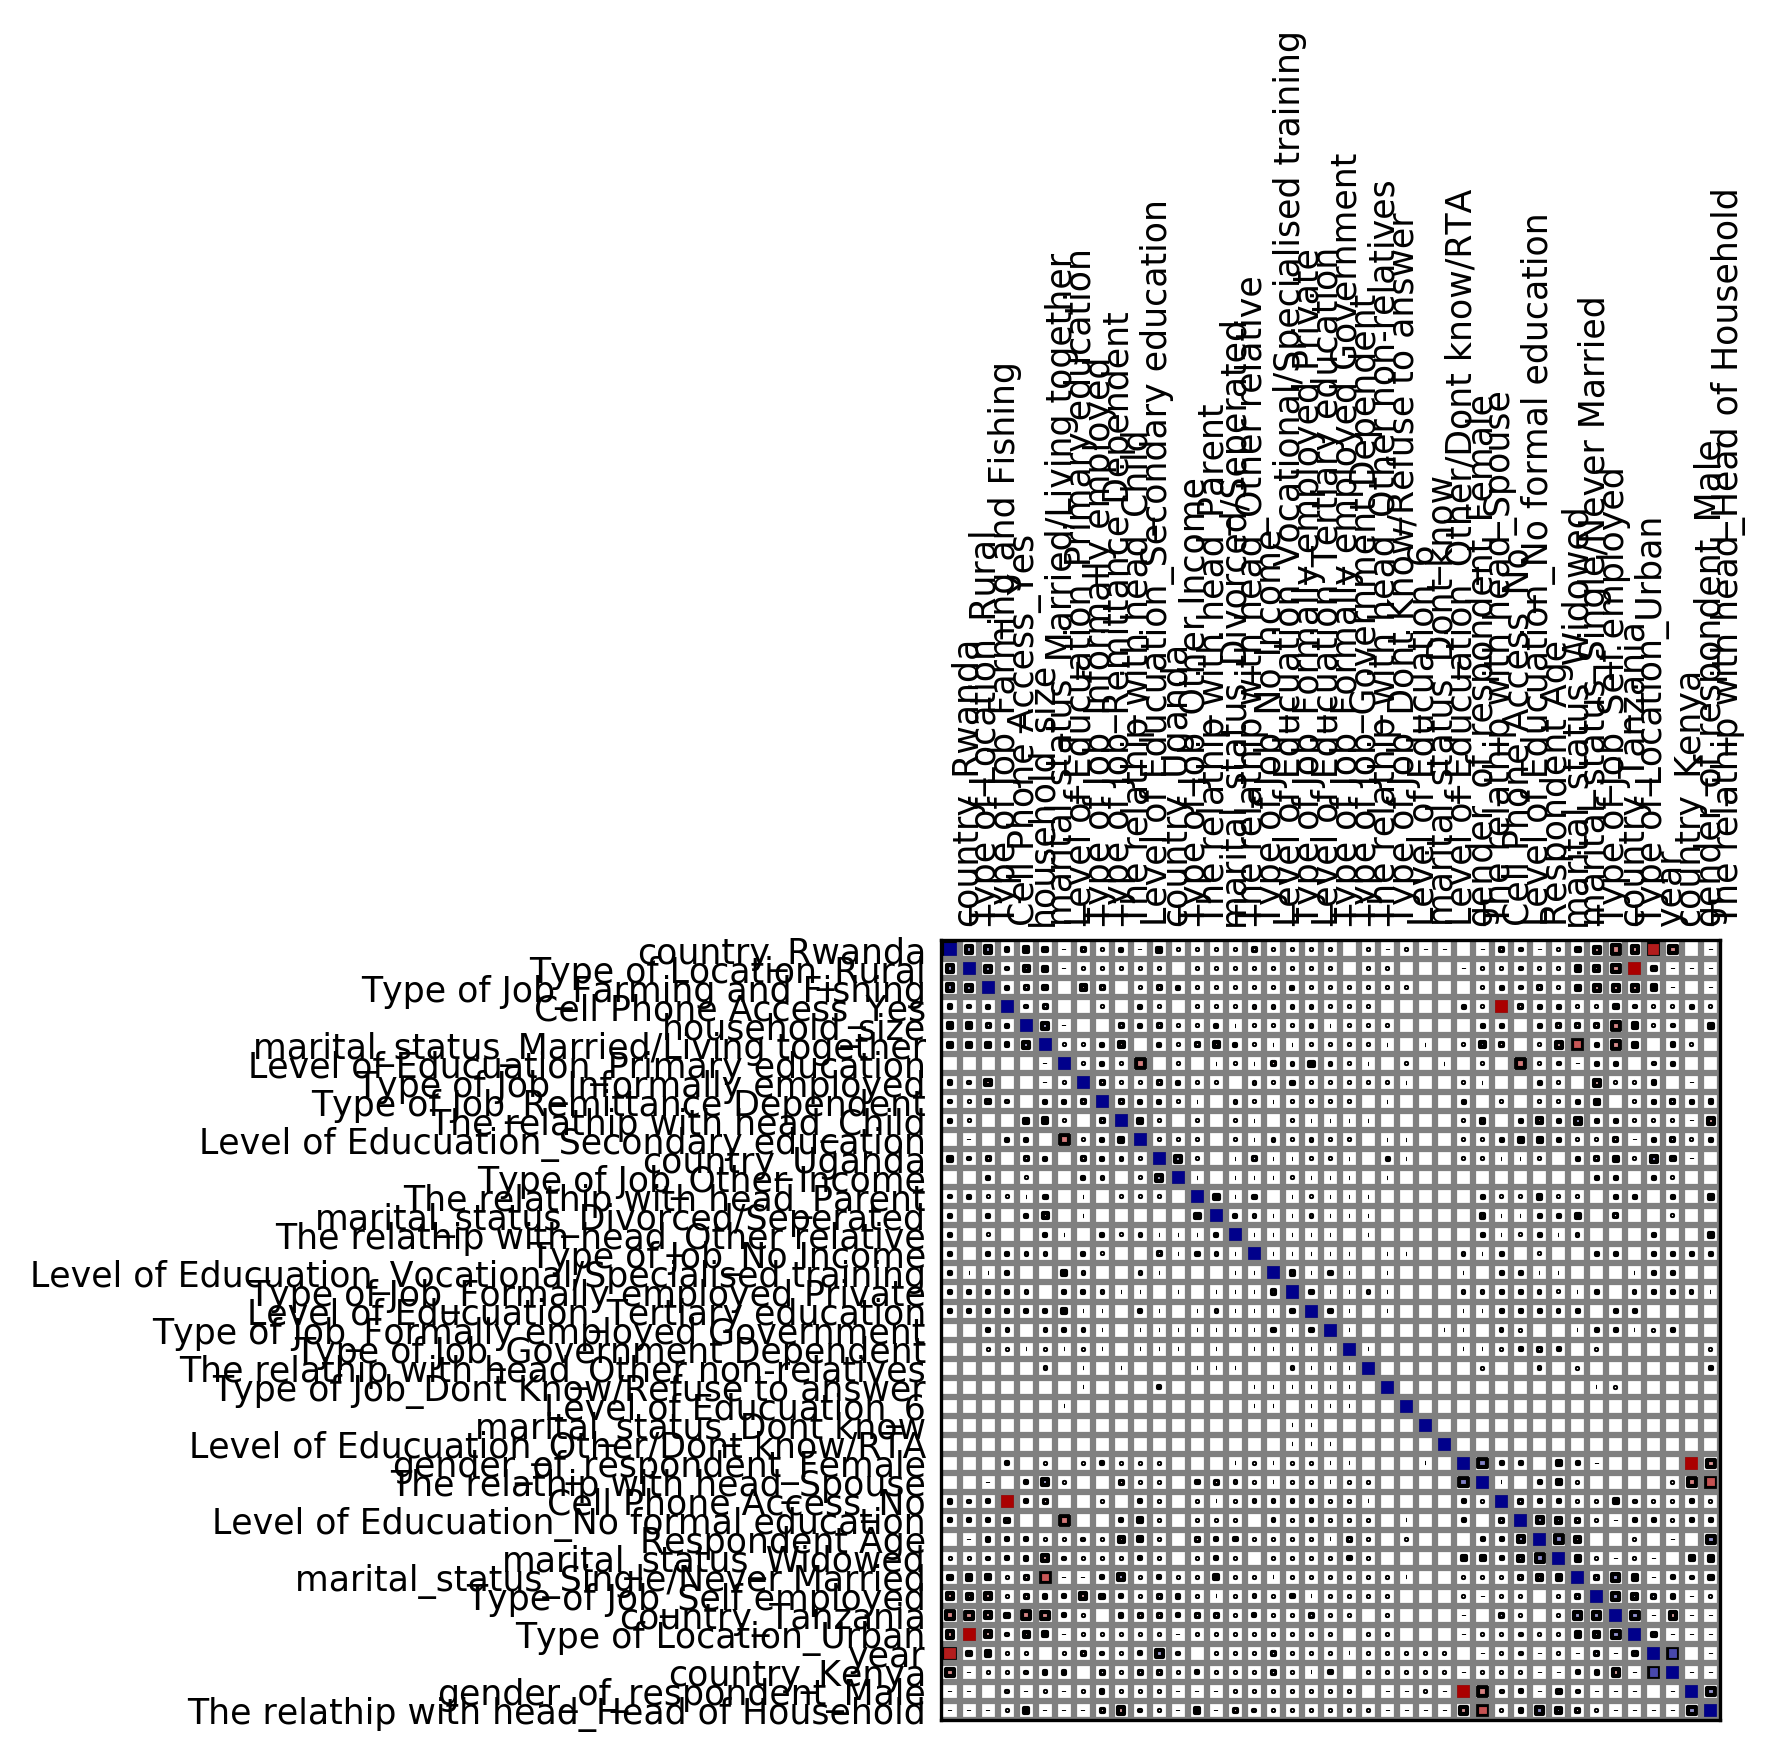

In [32]:
#plt.figure(dpi=300)
c.plot(colorbar=False, method='square', shrink=.9 ,rotation=90)

##Principal Component Analysis 

In [0]:
#before performing PCA, we have to create dummy variables of the categorical variables
#but first we have to divide the dataset into a feature set and the corresponding labels
x = Fin.drop('Has a Bank account', 1)
y = Fin['Has a Bank account']

In [0]:
#previewing the two new dataframes
x.head()

,country,year,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Has a Bank account, dtype: object

In [0]:
#creating dummy variables for the categorical variables
x = pd.get_dummies(x)


In [0]:
#previewing the new dataset
X.head()

,year,household_size,Respondent Age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,2018,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
x.columns

Index(['year', 'household_size', 'Respondent Age', 'country_Kenya',
       'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'Type of Location_Rural', 'Type of Location_Urban',
       'Cell Phone Access_No', 'Cell Phone Access_Yes',
       'gender_of_respondent_Female', 'gender_of_respondent_Male',
       'The relathip with head_Child',
       'The relathip with head_Head of Household',
       'The relathip with head_Other non-relatives',
       'The relathip with head_Other relative',
       'The relathip with head_Parent', 'The relathip with head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'Level of Educuation_6', 'Level of Educuation_No formal education',
       'Level of Educuation_Other/Dont know/RTA',
       'Level of Educuation_Primary education',
       'Level of Educuation_Secondary education',
       

In [0]:
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:
# Using standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
#performing PCA accounting for 95% variance
from sklearn.decomposition import PCA

pca = PCA(.95)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [0]:
# Step 7: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.10603319, 0.07561987, 0.07268707, 0.06512966, 0.05385765,
       0.04820952, 0.04186027, 0.0371588 , 0.03635902, 0.03249073,
       0.03101498, 0.02825261, 0.0273882 , 0.02631192, 0.02609561,
       0.02582038, 0.02571864, 0.0253283 , 0.02518543, 0.02493763,
       0.02473638, 0.02426833, 0.02302675, 0.02201123, 0.02055324])

In [0]:
# Step 9: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [0]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
print(cm)
print('Accuracy', a)

[[4028    8]
 [ 575   57]]
Accuracy 0.8751071122536418


In [0]:
#

However, after performing PCA, the model is not able to correctly predict for people who will not or don't have bank accounts.
therefore, we will try using LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ld1 = LDA(n_components=23)
x_train = ld1.fit_transform(x_train, y_train)
x_test = ld1.transform(x_test)
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

c1 = confusion_matrix(y_test, y_pred)
print(c1)
print('Accuracy', str(accuracy_score(y_test, y_pred)))

[[3982   54]
 [ 474  158]]
Accuracy 0.8868894601542416


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
